In [8]:
import numpy as np
import matplotlib.pyplot as plt

Choose the number of components to truncate in PCA.

In [9]:
data = np.load("../data/preprocessed/train.npy")
data.shape

(25000, 8712)

In [67]:
means = np.reshape(np.mean(data, axis=1), (-1, 1))
centered = data - means
std = np.reshape(np.std(centered, axis=1), (-1, 1))
scaled = data / std

In [113]:
u, s, vh = np.linalg.svd(scaled, full_matrices=False)

In [114]:
pct_var = s**2 / np.sum(s ** 2) * 100
i = 0
while np.sum(pct_var[:i]) < 99.5:
    i += 1

pct_var[:i]

array([20.353935  , 13.9309225 , 11.2064    , 11.162218  ,  3.6019747 ,
        3.562339  ,  2.740519  ,  2.6783931 ,  1.8585434 ,  1.8395202 ,
        1.1278533 ,  1.0651233 ,  0.99415547,  0.96297365,  0.9245719 ,
        0.8777807 ,  0.80400777,  0.7932228 ,  0.7689632 ,  0.7536753 ,
        0.7282294 ,  0.67632437,  0.64894235,  0.62205416,  0.6160869 ,
        0.5894586 ,  0.5868279 ,  0.57993066,  0.5508036 ,  0.54107654,
        0.5040966 ,  0.4978674 ,  0.48139015,  0.4713439 ,  0.45794663,
        0.45597857,  0.40900344,  0.3945054 ,  0.36574996,  0.35657784,
        0.34659648,  0.341923  ,  0.27098304,  0.2619055 ,  0.24393068,
        0.23635991,  0.20949215,  0.19946846,  0.17700796,  0.15357922,
        0.14732483,  0.14500476,  0.140684  ,  0.11820688,  0.11783708,
        0.10907352,  0.10571627,  0.10384114,  0.1007195 ,  0.10026995,
        0.09808056,  0.0950774 ,  0.09381466,  0.09059693,  0.08910632,
        0.08802587,  0.08675029,  0.08519117,  0.08413775,  0.08

In [115]:
i

117

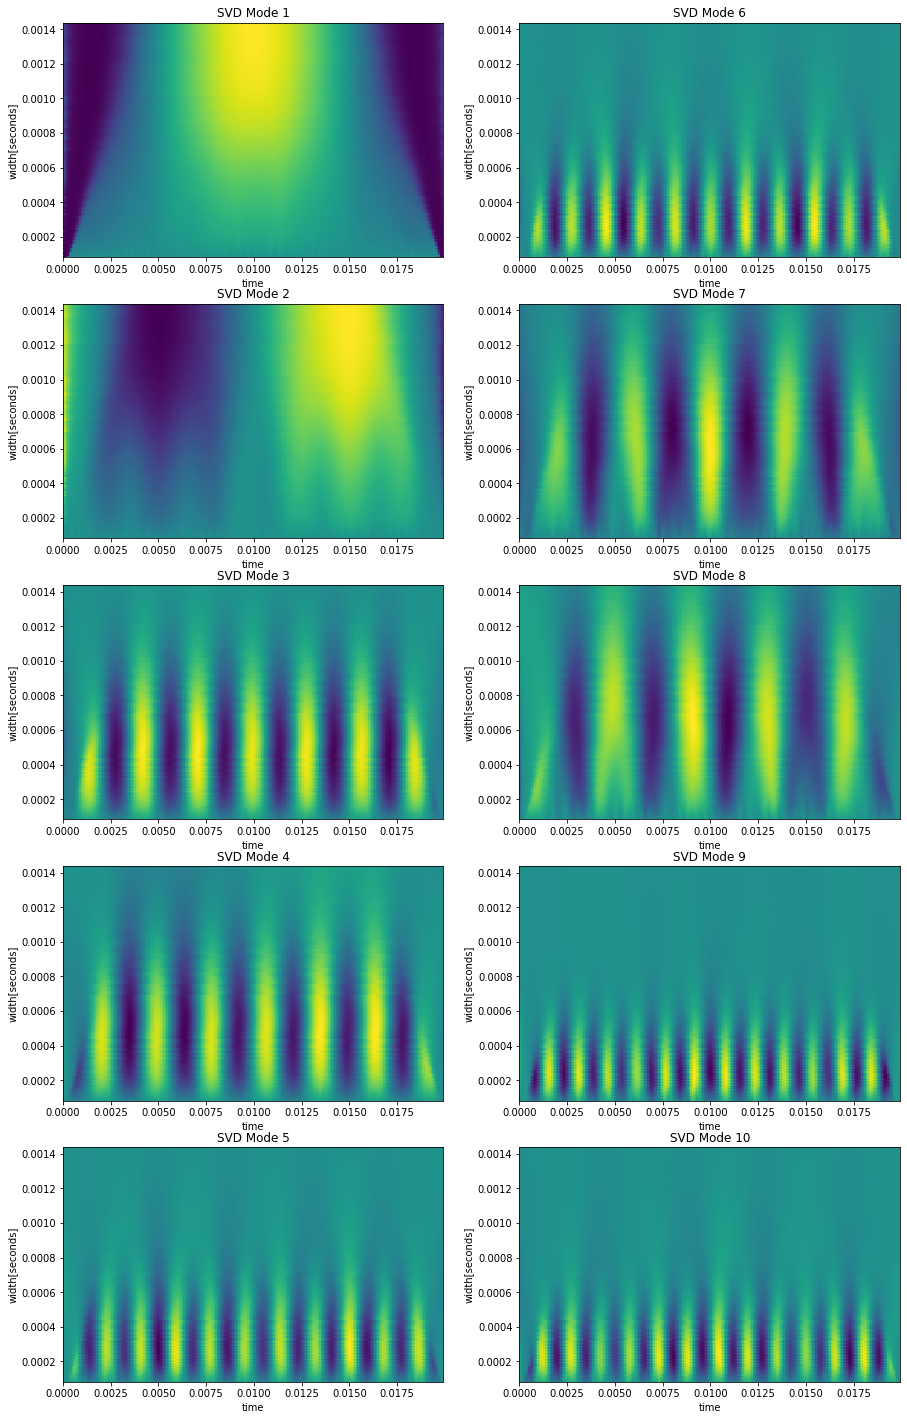

In [116]:
fig, ax = plt.subplots(5, 2, figsize=(15, 25))
widths = [2 ** (j / 24)for j in range(1, 101)]
dt = 20e-3 / 250
y = np.array(widths) * dt
x = np.array([j * dt for j in range(250)])
for j in range(10):
    pos = (j % 5, j // 5)
    a = ax[pos[0]][pos[1]]
    a.pcolormesh(x, y, np.reshape(u[:, j], (100, 250)))
    a.set_title(f"SVD Mode {j + 1}")
    a.set_xlabel("time")
    a.set_ylabel("width[seconds]")

So we can use a cutoff of $i = 117$ to capture 99.5% variance in the scalograms. These are the modes responsible for 99.5% of the variance in the training set.

In [72]:
from sklearn.decomposition import PCA

Percent variance accounted for: 99.52839016914368


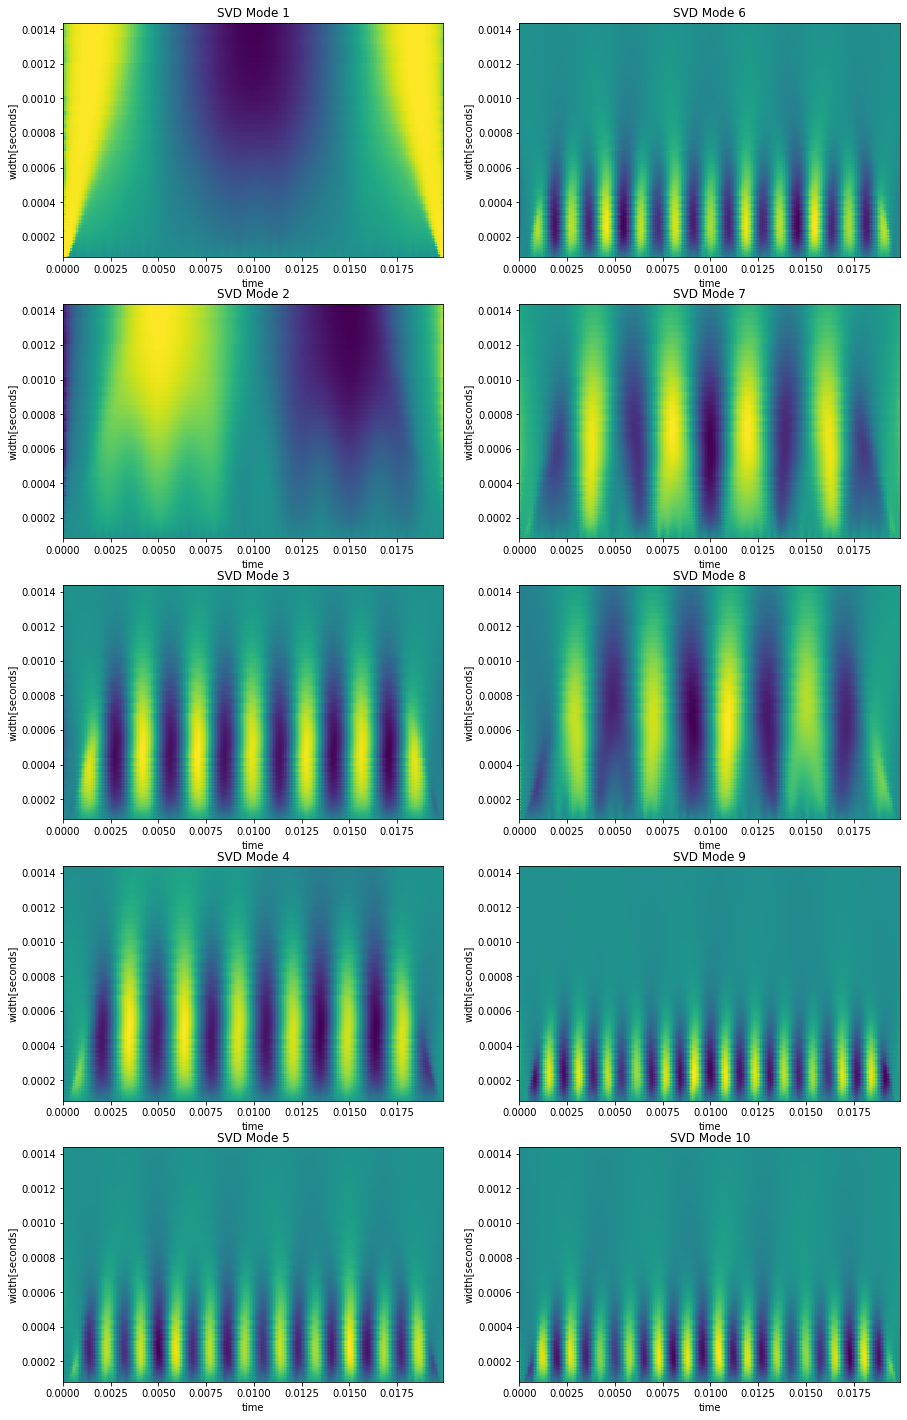

In [117]:
# check the components match our SVD solution
pca = PCA(n_components=117)
low_rank = pca.fit_transform(scaled.T)
fig, ax = plt.subplots(5, 2, figsize=(15, 25))
widths = [2 ** (j / 24)for j in range(1, 101)]
dt = 20e-3 / 250
y = np.array(widths) * dt
x = np.array([j * dt for j in range(250)])
for j in range(10):
    pos = (j % 5, j // 5)
    a = ax[pos[0]][pos[1]]
    a.pcolormesh(x, y, np.reshape(pca.components_[j, :], (100, 250)))
    a.set_title(f"SVD Mode {j + 1}")
    a.set_xlabel("time")
    a.set_ylabel("width[seconds]")
print(f"Percent variance accounted for: {np.sum(pca.explained_variance_ratio_) * 100}")